In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2, venn3
import numpy as np

In [2]:
proteomic_diff_expression = pd.read_csv('data/Proteomics_differential_expression_df.csv')
transcriptomic_diff_expression = pd.read_csv('data/Transcriptomics_differential_expression_df.csv')
delta_corr_pvals = pd.read_csv('data/full_10k_permutation_corrected.csv')

delta_corr_pvals = delta_corr_pvals.melt(id_vars='Cancer', var_name = 'Gene', value_name = 'perm_pval')
delta_corr_pvals['Cancer'] = [cancer.upper() for cancer in delta_corr_pvals.Cancer]
delta_corr_pvals = delta_corr_pvals.replace('EN', 'Endometrial')
delta_corr_pvals = delta_corr_pvals.dropna()

In [3]:
cancers = pd.unique(proteomic_diff_expression.Cancer)

In [4]:
proteomic_diff_expression = proteomic_diff_expression[proteomic_diff_expression.Gene.isin(delta_corr_pvals.Gene)]
proteomic_diff_expression = proteomic_diff_expression[proteomic_diff_expression.FDR < 0.05]
proteomic_diff_expression = proteomic_diff_expression[np.array(proteomic_diff_expression.Log2_fold_change > 1) | 
                                                     np.array(proteomic_diff_expression.Log2_fold_change < -1)]
transcriptomic_diff_expression = transcriptomic_diff_expression[transcriptomic_diff_expression.Gene.isin(delta_corr_pvals.Gene)]
transcriptomic_diff_expression = transcriptomic_diff_expression[transcriptomic_diff_expression.FDR < 0.05]
transcriptomic_diff_expression = transcriptomic_diff_expression[np.array(transcriptomic_diff_expression.Log2_fold_change > 1) | 
                                                     np.array(transcriptomic_diff_expression.Log2_fold_change < -1)]
delta_corr_pvals = delta_corr_pvals[delta_corr_pvals.perm_pval < 0.05]

C:\Users\nanel\anaconda3\lib\site-packages\matplotlib_venn\_venn2.py:50: UserWarning: Both circles have zero area
  warnings.warn("Both circles have zero area")


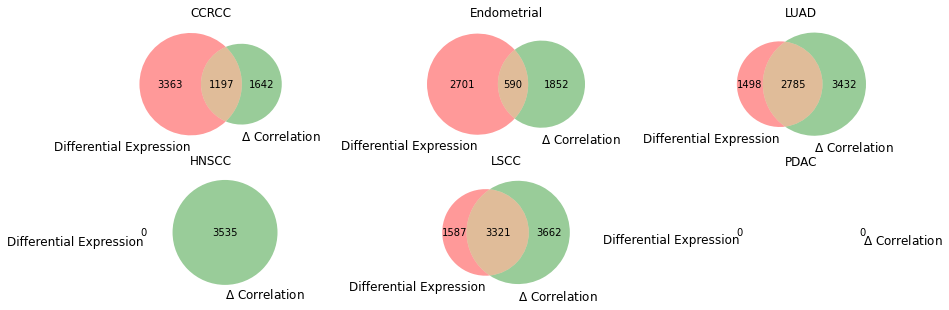

In [5]:
#proteomics comparison
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15,5))
row = 0
col = 0
for cancer in cancers:
    if col == 3:
        row += 1
        col = 0
    sig_prot = set(proteomic_diff_expression[proteomic_diff_expression.Cancer == cancer].Gene)
    #sig_trans = set(proteomic_diff_expression[proteomic_diff_expression.Cancer == cancer].Gene)
    #sig_diff_exp = sig_prot | sig_trans
    sig_corr = set(delta_corr_pvals[delta_corr_pvals.Cancer == cancer].Gene)
    plt.sca(ax[row][col])
    venn2([sig_prot, sig_corr], ('Differential Expression', r'$\Delta$' + ' Correlation'), ax = plt.gca())
    plt.gca().set_title(cancer)
    col += 1
plt.savefig('Figures/Figure S3) Differential Protein Expression vs Correlation Change.png')